## Attività pratica N. 3

Caricare il dataset 'mpg' della libreria seaborn in un dataframe chiamato mpg, ed eseguire le seguenti task:

1) Visualizzare le prime 5 righe del dataframe mpg (head), e l'informazione di base (info)

2) Costruire un dataframe (DataFrame) per visualizzare la media, il minimo e il massimo valore di tutte le colonne numeriche del dataframe mpg

3) Costruire un dataframe (DataFrame) con il nome e la quantità di valori diversi presenti nelle colonne chiamate name, origin, cylinders e model_year

4) Individuare le righe del dataframe mpg dove ci sono dati mancanti (null, NaN, None, ecc)

5) Sostituire i dati mancanti trovati con dei valori verosimili estratti dallo stesso dataframe, giustificando la scelta

6) Trovare la macchina giapponese più recente del dataset, con il massimo mpg e la massima accelerazione 

7) Aggiungere al dataframe mpg una nuova colonna chiamata kml, con la conversione dei valori della colonna mpg a chilometri per litro

8) Aggiungere un'altra colonna al dataframe mpg chiamata marca, con la marca di ogni macchina estratta dalla colonna name (usare l'attributo pd.Series.str e scegliere il metodo più conveniente)

9) Una volta creata la colonna marca, verificare i valori diversi presenti e correggere gli eventuali errori

10) Creare un grafico a barre per mostrare la quantità di dati per ogni marca 

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1) Visualizzare l'informazione di base (info)

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


1) Visualizzare le prime 5 righe del dataframe mpg (head)

In [ ]:
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


2) Costruire un dataframe (DataFrame) per visualizzare la media, il minimo e il massimo valore di tutte le colonne numeriche del dataframe mpg

In [ ]:
pippo = pd.DataFrame(mpg)
pippo.describe().drop(['count', 'std', '25%', '50%', '75%'])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.56809,76.01005
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.00000,70.00000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.80000,82.00000


3) Costruire un dataframe (DataFrame) con il nome e la quantità di valori diversi presenti nelle colonne chiamate name, origin, cylinders e model_year

In [ ]:
pippo2 = pd.DataFrame(mpg)
pippo2.nunique().drop(['mpg', 'acceleration', 'weight', 'horsepower', 'displacement'])

cylinders       5
model_year     13
origin          3
name          305
dtype: int64

4) Individuare le righe del dataframe mpg dove ci sono dati mancanti (null, NaN, None, ecc)

In [ ]:
mpg[mpg.isnull().any(axis=1)] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


5) Sostituire i dati mancanti trovati con dei valori verosimili estratti dallo stesso dataframe, giustificando la scelta

In [ ]:
mpg.iloc[32, 3] = 8
mpg.iloc[126, 3] = 9
mpg.iloc[330, 3] = 7
mpg.iloc[336, 3] = 6
mpg.iloc[354, 3] = 8
mpg.iloc[374, 3] = 9

6) Trovare la macchina giapponese più recente del dataset, con il massimo mpg e la massima accelerazione 

In [ ]:
cond1= mpg[mpg['origin'] == 'japan']
cond2= mpg[mpg['model_year'].max()]
cond3= mpg[mpg['mpg'].max()]
cond4= mpg[mpg['accelleration'].max()]

mpg.loc[cond1 & cond2 & cond3 & cond4]

#risultato = mpg[cond1 & cond2 & cond3 & cond4]
#risultato

#ho provato diversi metodi per concatenare le query

KeyError: ignored

7) Aggiungere al dataframe mpg una nuova colonna chiamata kml, con la conversione dei valori della colonna mpg a chilometri per litro

In [4]:
#mpg.assign( kml = mpg['mpg']/2.352)
mpg['klm'] = mpg['mpg']/2.352
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,klm
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.227891
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,11.479592
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,18.707483
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,13.605442
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,11.904762


8) Aggiungere un'altra colonna al dataframe mpg chiamata marca, con la marca di ogni macchina estratta dalla colonna name (usare l'attributo pd.Series.str e scegliere il metodo più conveniente)

In [5]:
nome_marca = mpg['name'].str
first, *middle, last = nome_marca.split()

#mpg.assign(marca = first[0])
mpg['marca'] =  marca = first[0]
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,klm,marca
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.653061,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.377551,chevrolet
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.653061,chevrolet
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.802721,chevrolet
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.227891,chevrolet
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,11.479592,chevrolet
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,18.707483,chevrolet
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,13.605442,chevrolet
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,11.904762,chevrolet


9) Una volta creata la colonna marca, verificare i valori diversi presenti e correggere gli eventuali errori

10) Creare un grafico a barre per mostrare la quantità di dati per ogni marca 

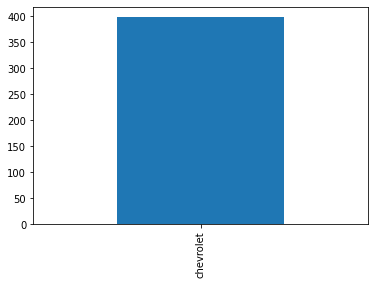

In [6]:
mpg['marca'].value_counts().plot.bar()